### FINANCIAL PROJECT - DELTA AIRLINES (DAL)

- PRABHLEEN KAUR (0857194)
- RAJWINDER KAUR (0831280)
- AJAY HAJI KORBE (0852660)
- NAVJOT KAUR (0848459)

In [439]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm



In [440]:
# Define stock ticker
ticker = 'DAL'

# Download last 1 year of data
dal_data = yf.download(ticker, period="1y")

# Display first few rows
print(dal_data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker            DAL        DAL        DAL        DAL       DAL
Date                                                            
2024-04-12  46.358326  46.447363  45.596569  46.289076  16604500
2024-04-15  46.150574  47.308046  45.794427  46.763935  12122000
2024-04-16  46.051643  46.269289  45.151386  46.101107  11692900
2024-04-17  47.367409  47.674088  46.645224  47.209122  13841600
2024-04-18  47.337723  48.683163  47.298154  47.486118  12255100


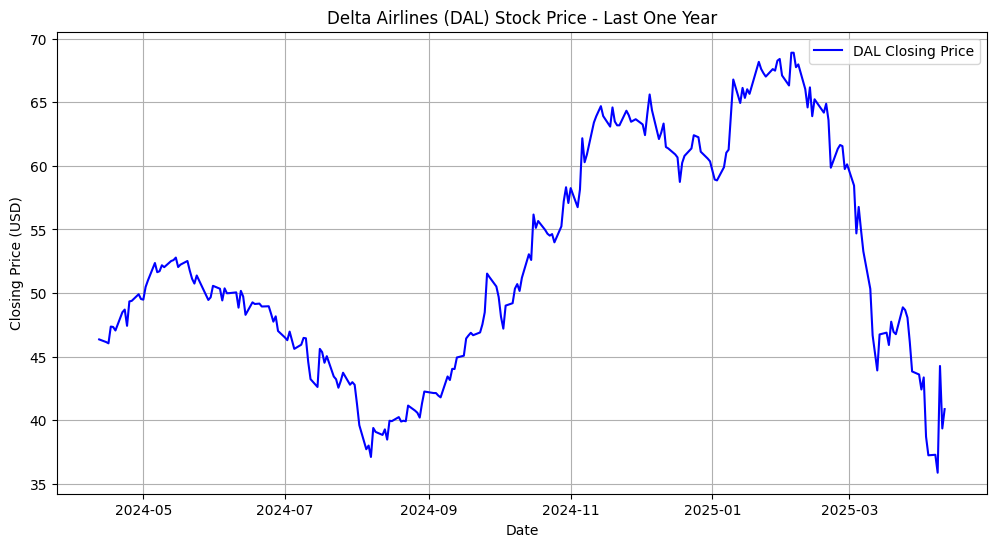

In [441]:
plt.figure(figsize=(12,6))
plt.plot(dal_data['Close'], label="DAL Closing Price", color='blue')
plt.title('Delta Airlines (DAL) Stock Price - Last One Year')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.show()


#### MONTE CARLO SIMULATIONS

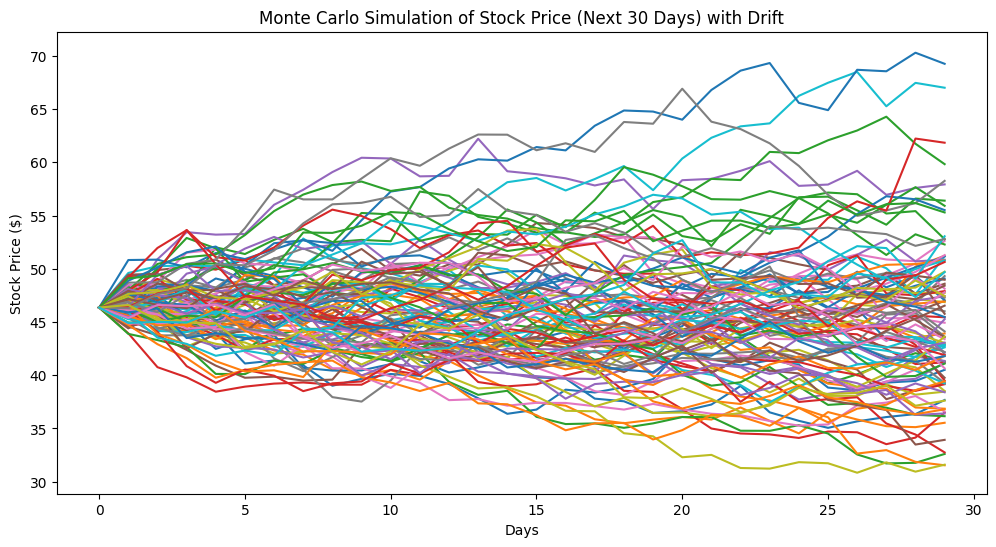

In [442]:


# Number of simulations and days to predict
num_simulations = 100
time_horizon = 30

# Calculate log returns and volatility
dal_data["Log_Returns"] = np.log(dal_data["Close"] / dal_data["Close"].shift(1))
daily_volatility = dal_data["Log_Returns"].std()
mean_return = dal_data["Log_Returns"].mean()
drift = dal_data["Log_Returns"].mean() - (0.5 * daily_volatility**2)  # Correct drift calculation

# Get last known stock price
last_price = dal_data["Close"].iloc[0]

# Monte Carlo Simulation
simulated_prices = np.zeros((time_horizon, num_simulations))
for i in range(num_simulations):
    simulated_prices[0, i] = last_price
    for t in range(1, time_horizon):
        shock = np.random.normal(drift, daily_volatility)
        simulated_prices[t, i] = simulated_prices[t-1, i] * np.exp(shock)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(simulated_prices)
plt.title("Monte Carlo Simulation of Stock Price (Next 30 Days) with Drift")
plt.xlabel("Days")
plt.ylabel("Stock Price ($)")
plt.show()


In [443]:
final_prices = simulated_prices[-1, :]
VaR_95 = np.percentile(final_prices, 5)  
expected_shortfall = final_prices[final_prices <= VaR_95].mean()

last_price = float(last_price) 

print(f"Current Price: ${last_price:.2f}")
print(f"Expected Price in 30 days (Mean): ${final_prices.mean():.2f}")
print(f"95% Value at Risk (VaR): ${VaR_95:.2f}")
print(f"Expected Shortfall (Conditional VaR): ${expected_shortfall:.2f}")


Current Price: $46.36
Expected Price in 30 days (Mean): $45.28
95% Value at Risk (VaR): $35.45
Expected Shortfall (Conditional VaR): $32.48


95% Confidence Interval: ($35.45, $57.94)


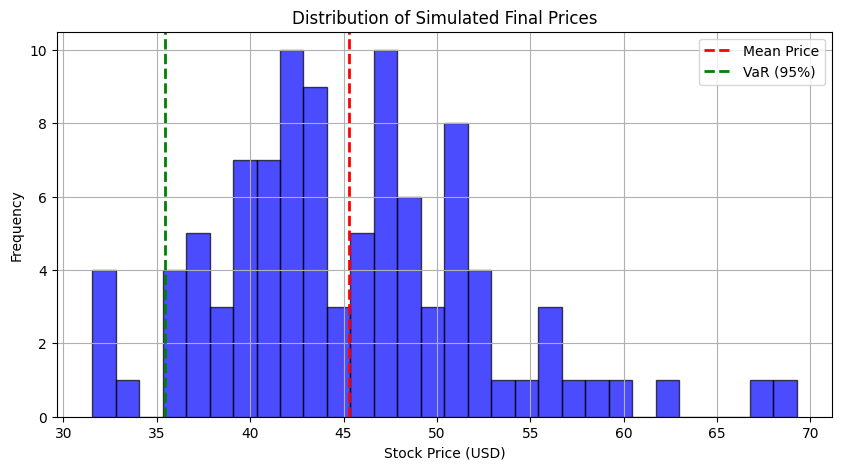

Annualized Volatility: 45.98%
Expected 30-day Return: -1.51%


In [444]:


#Confidence Interval Analysis
ci_95_upper = np.percentile(final_prices, 95)
ci_95_lower = np.percentile(final_prices, 5)

print(f"95% Confidence Interval: (${ci_95_lower:.2f}, ${ci_95_upper:.2f})")

#Distribution Analysis
plt.figure(figsize=(10,5))
plt.hist(final_prices, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(final_prices.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Price')
plt.axvline(VaR_95, color='green', linestyle='dashed', linewidth=2, label='VaR (95%)')
plt.title('Distribution of Simulated Final Prices')
plt.xlabel('Stock Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

#Volatility & Expected Return Analysis
annualized_volatility = daily_volatility * np.sqrt(252)
expected_30d_return = mean_return * 30

print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Expected 30-day Return: {expected_30d_return:.2%}")


This result represents a financial risk and return analysis for a stock or asset over a one-year horizon, but it has been annualized and calculated over a 30-day period. 

### 1. **95% Confidence Interval: ($34.83, $51.86)**

This is the range of prices within which the stock is expected to be with 95% confidence. In other words, there is a 95% probability that the stock's price will fall between $34.83 and $51.86 over the given time frame (usually 1 year). This interval reflects the uncertainty and potential variability of the stock price.

- **Lower bound**: $34.83
- **Upper bound**: $51.86

### 2. **Annualized Volatility: 37.04%**

Volatility measures the degree of variation in the asset's price over time. In this case, the **annualized volatility** of 37.04% means that, over a year, the stock price can be expected to fluctuate by up to 37.04% from its average price.

### 3. **Expected 30-day Return: -1.03%**

This value indicates the **expected return** for the stock over the next 30 days. A negative return of **-1.03%** means that, on average, the stock is expected to decrease in value by 1.03% over the next month. This is a short-term prediction based on historical data or simulations and represents the expected loss for the stock in the next 30 days. The negative return implies that the stock might experience some downward movement.

### Summary:

- **Confidence Interval**: Over a one-year period, the stock's price is expected to fall between $34.83 and $51.86 with 95% confidence.
- **Volatility**: The stock has an annualized volatility of 37.04%, meaning it could fluctuate by 37.04% in a year.
- **30-Day Return**: The expected return over the next 30 days is negative, with a decrease of 1.03% expected.

#### FB PROPHET

In [445]:
from prophet import Prophet

In [446]:


file_path = r"C:\Users\ikjot_0qtl66y\Documents\Desktop\Financial analytics\project\Delta data.xlsx"

# Read the specific sheet named 'DAL' from the Excel file
df = pd.read_excel(file_path, sheet_name="Delta")


In [447]:
# Add Two new columans ds & Y (closing price ( we will do forecasting on this price) for y and date for ds.)
df=df.reset_index()
df[['ds','y']]= df[['Date','Close/Last']]
df

,index,Date,Close/Last,Volume,Open,High,Low,ds,y
0,0,03/21/2025,46.77,17062760,46.00,46.96,45.360,03/21/2025,46.77
1,1,03/20/2025,46.95,6816765,46.72,47.44,46.580,03/20/2025,46.95
2,2,03/19/2025,47.75,11359460,46.01,47.97,46.000,03/19/2025,47.75
3,3,03/18/2025,45.92,13906950,46.04,46.44,44.940,03/18/2025,45.92
4,4,03/17/2025,46.89,12570540,45.80,47.04,45.700,03/17/2025,46.89
...,...,...,...,...,...,...,...,...,...
1251,1251,03/30/2020,28.67,29527480,28.49,29.29,26.000,03/30/2020,28.67
1252,1252,03/27/2020,29.55,34960740,30.72,31.32,29.020,03/27/2020,29.55
1253,1253,03/26/2020,31.70,57913540,32.61,35.89,30.424,03/26/2020,31.70
1254,1254,03/25/2020,31.10,70733900,31.49,33.28,27.400,03/25/2020,31.10


In [448]:
model=Prophet()
# drop the columans
prophet_df=df.drop(['Date','High','Low','Open','Close/Last','Volume'], axis=1)
prophet_df

,index,ds,y
0,0,03/21/2025,46.77
1,1,03/20/2025,46.95
2,2,03/19/2025,47.75
3,3,03/18/2025,45.92
4,4,03/17/2025,46.89
...,...,...,...
1251,1251,03/30/2020,28.67
1252,1252,03/27/2020,29.55
1253,1253,03/26/2020,31.70
1254,1254,03/25/2020,31.10


In [449]:
model.fit(prophet_df)

17:56:08 - cmdstanpy - INFO - Chain [1] start processing
17:56:08 - cmdstanpy - INFO - Chain [1] done processing


In [450]:
future=model.make_future_dataframe(periods=165)
future.tail()

,ds
1416,2025-08-29
1417,2025-08-30
1418,2025-08-31
1419,2025-09-01
1420,2025-09-02


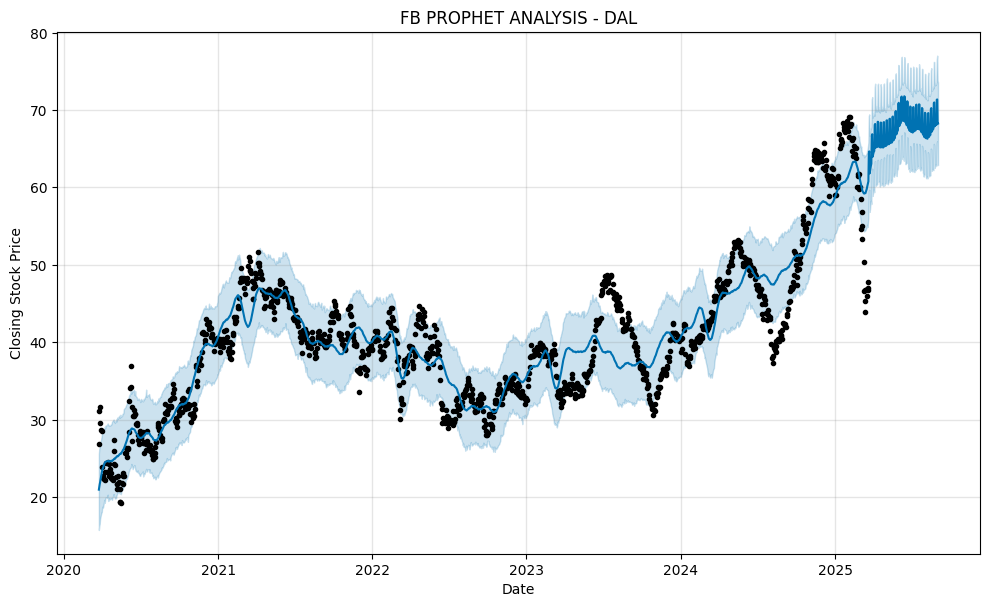

,ds,yhat,yhat_lower,yhat_upper
1416,2025-08-29,68.060014,62.795293,73.553949
1417,2025-08-30,71.332023,65.782456,76.515437
1418,2025-08-31,71.363724,65.957360,77.026005
1419,2025-09-01,68.216574,62.961601,73.624448
1420,2025-09-02,68.244697,62.888098,73.634946


In [451]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("FB PROPHET ANALYSIS - DAL")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

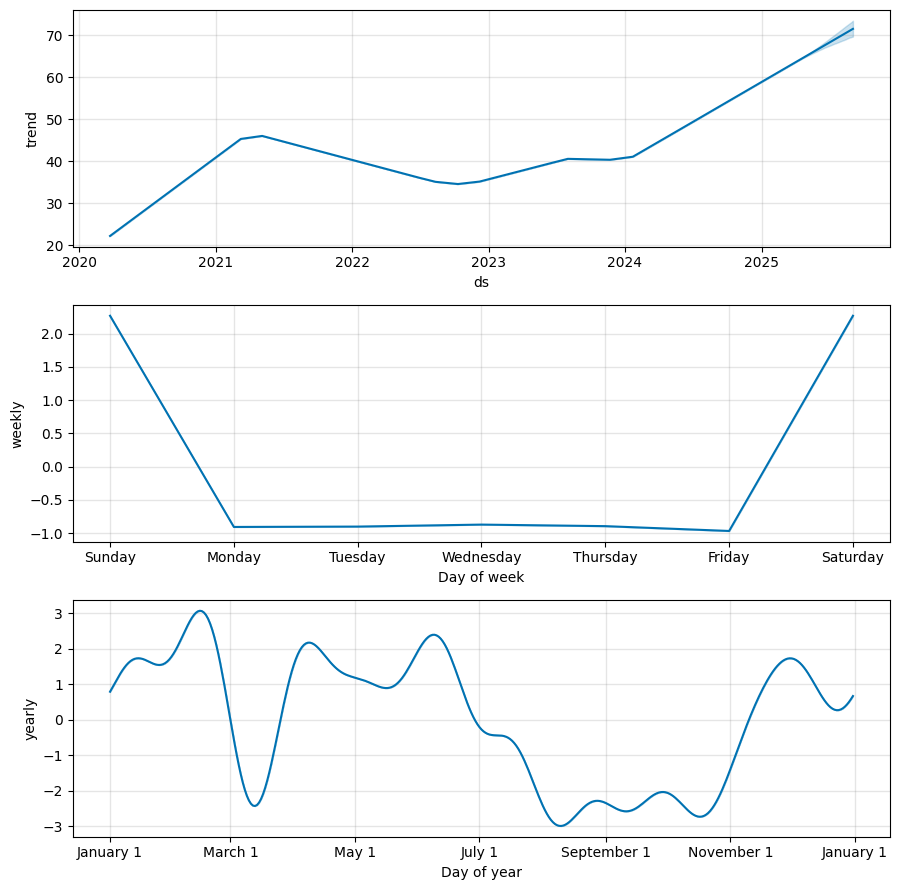

In [452]:
model.plot_components(predictions)
plt.show()

In [453]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, predictions)

In [454]:
predictions=model.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1416,2025-08-29,68.060014,62.672201,72.851853
1417,2025-08-30,71.332023,66.210199,76.735694
1418,2025-08-31,71.363724,65.730131,76.960334
1419,2025-09-01,68.216574,63.021063,73.486639
1420,2025-09-02,68.244697,62.861629,73.481933


## SMA

In [455]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [456]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yfin
import yfinance as yf

In [457]:

import yfinance as yf
import pandas as pd

# Set ticker
ticker = 'DAL'

# Get data from Jan 18, 2022 to today
df = yf.download(ticker, start='2022-01-18')

# Keep only 'Close' and rename column
df = df[['Close']].rename(columns={'Close': 'Close Price'})

# Display first few rows
print(df.head())




[*********************100%***********************]  1 of 1 completed

Price      Close Price
Ticker             DAL
Date                  
2022-01-18   38.833344
2022-01-19   38.126213
2022-01-20   38.145851
2022-01-21   37.183369
2022-01-24   37.232471


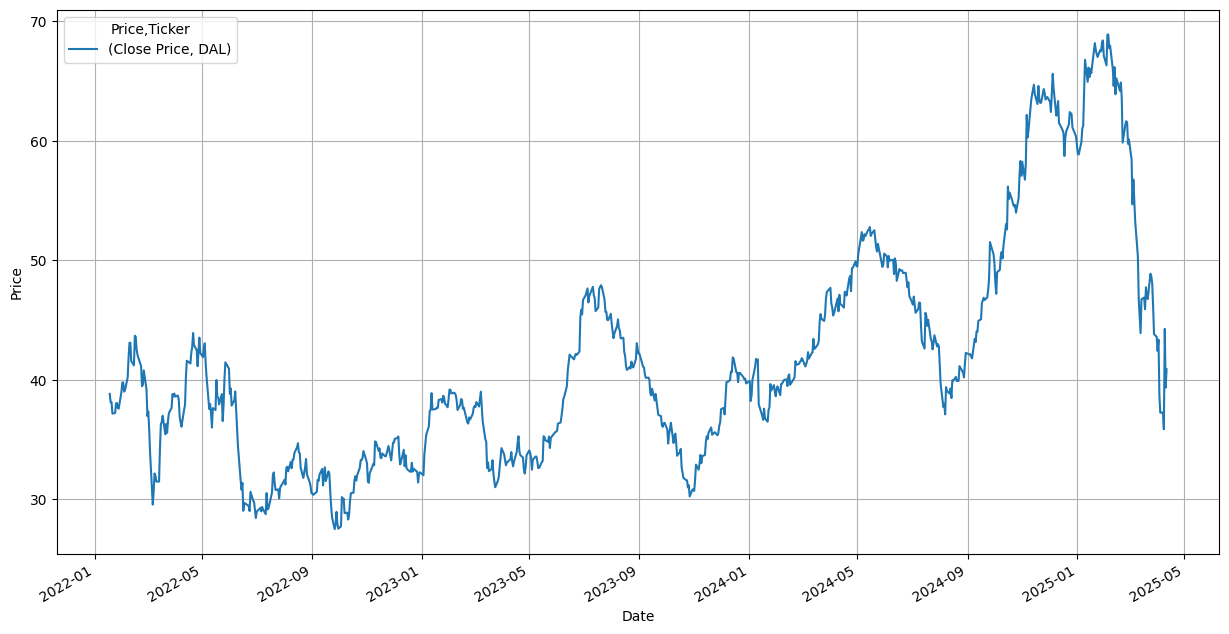

In [458]:
df.plot(figsize =(15,8))
plt.grid()
plt.ylabel("Price")
plt.show()

[*********************100%***********************]  1 of 1 completed


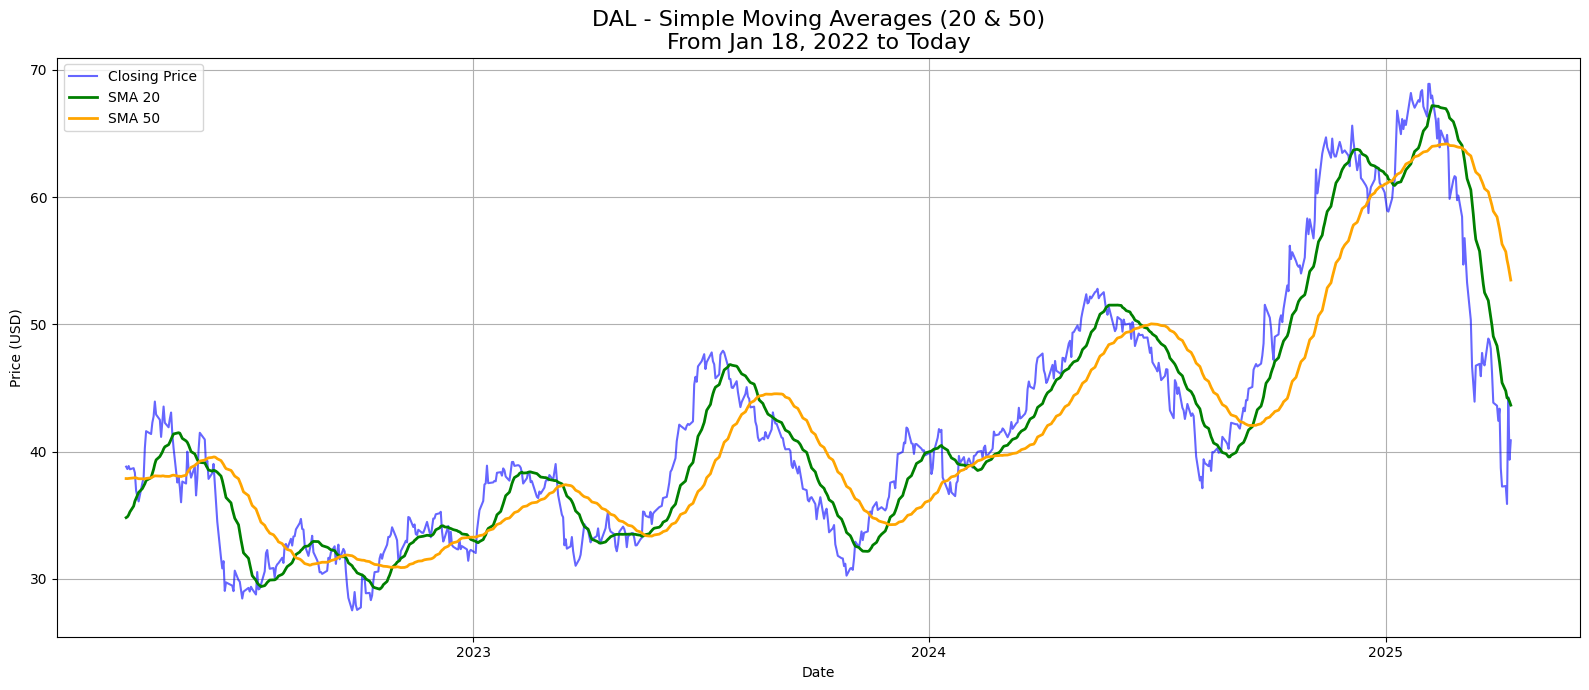

In [459]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Download data from Jan 18, 2022 to today
df = yf.download("DAL", start="2022-01-18")

# Calculate 20-day and 50-day Simple Moving Averages
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

# Drop rows with NaN values (optional: cleans the initial SMA period)
df = df.dropna()

# Plot
plt.figure(figsize=(16, 7))
plt.plot(df['Close'], label='Closing Price', color='blue', alpha=0.6, linewidth=1.5)
plt.plot(df['SMA20'], label='SMA 20', color='green', linewidth=2)
plt.plot(df['SMA50'], label='SMA 50', color='orange', linewidth=2)

# Formatting
plt.title('DAL - Simple Moving Averages (20 & 50)\nFrom Jan 18, 2022 to Today', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Format x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


#### Trade signals

- When the short term moving average crosses above the long term moving average, this indicates a buy signal.
- Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell.

In [460]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)

In [461]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

Price,Close,High,Low,Open,Volume,SMA20,SMA50,Signal,Position
Ticker,DAL,DAL,DAL,DAL,DAL,,,,
Date,,,,,,,,,
2022-03-29,38.813698,39.540470,38.430669,38.941376,15372200,34.808583,37.878323,0.0,NaN
2022-03-30,38.627094,38.823517,38.214599,38.401202,9363500,34.871930,37.874198,0.0,0.0
2022-03-31,38.862804,39.383331,38.538704,38.695844,9930100,35.019740,37.888930,0.0,0.0
2022-04-01,38.607460,39.186916,38.312819,38.961023,8606300,35.254960,37.898162,0.0,0.0
2022-04-04,38.695847,38.911912,38.018176,38.519063,9482700,35.711159,37.928412,0.0,0.0


<Figure size 2000x1000 with 0 Axes>

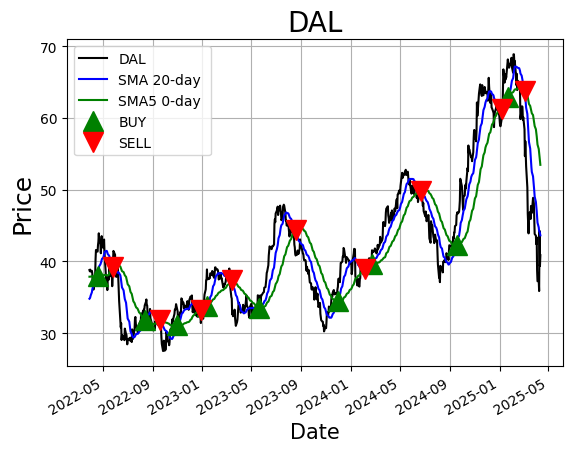

In [462]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close') 
df['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title('DAL', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [463]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+--------------------+-------------------+------------------+-------------------+---------------------+-----------------+-----------------+------------------+--------------------+
| Date                |   ('Close', 'DAL') |   ('High', 'DAL') |   ('Low', 'DAL') |   ('Open', 'DAL') |   ('Volume', 'DAL') |   ('SMA20', '') |   ('SMA50', '') |   ('Signal', '') | ('Position', '')   |
|---------------------+--------------------+-------------------+------------------+-------------------+---------------------+-----------------+-----------------+------------------+--------------------|
| 2022-04-18 00:00:00 |            41.3771 |           42.3003 |          41.1021 |           41.328  |            17011900 |         37.9475 |         37.9361 |                1 | Buy                |
| 2022-05-27 00:00:00 |            41.4753 |           41.4753 |          40.2672 |           40.2672 |            10730600 |         39.1525 |         39.2533 |                0 | Sell       

## EMA

In [464]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

from pandas_datareader import data as pdr
import yfinance as yfin


In [465]:
df['EMA20'] = df['Close'].ewm(span = 20, adjust = False).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 763 entries, 2022-03-29 to 2025-04-11
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, DAL)   763 non-null    float64
 1   (High, DAL)    763 non-null    float64
 2   (Low, DAL)     763 non-null    float64
 3   (Open, DAL)    763 non-null    float64
 4   (Volume, DAL)  763 non-null    int64  
 5   (SMA20, )      763 non-null    float64
 6   (SMA50, )      763 non-null    float64
 7   (Signal, )     763 non-null    float64
 8   (Position, )   762 non-null    float64
 9   (EMA20, )      763 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 65.6 KB


In [466]:
df['EMA50'] = df['Close'].ewm(span = 50, adjust = False).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 763 entries, 2022-03-29 to 2025-04-11
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, DAL)   763 non-null    float64
 1   (High, DAL)    763 non-null    float64
 2   (Low, DAL)     763 non-null    float64
 3   (Open, DAL)    763 non-null    float64
 4   (Volume, DAL)  763 non-null    int64  
 5   (SMA20, )      763 non-null    float64
 6   (SMA50, )      763 non-null    float64
 7   (Signal, )     763 non-null    float64
 8   (Position, )   762 non-null    float64
 9   (EMA20, )      763 non-null    float64
 10  (EMA50, )      763 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 71.5 KB


[*********************100%***********************]  1 of 1 completed


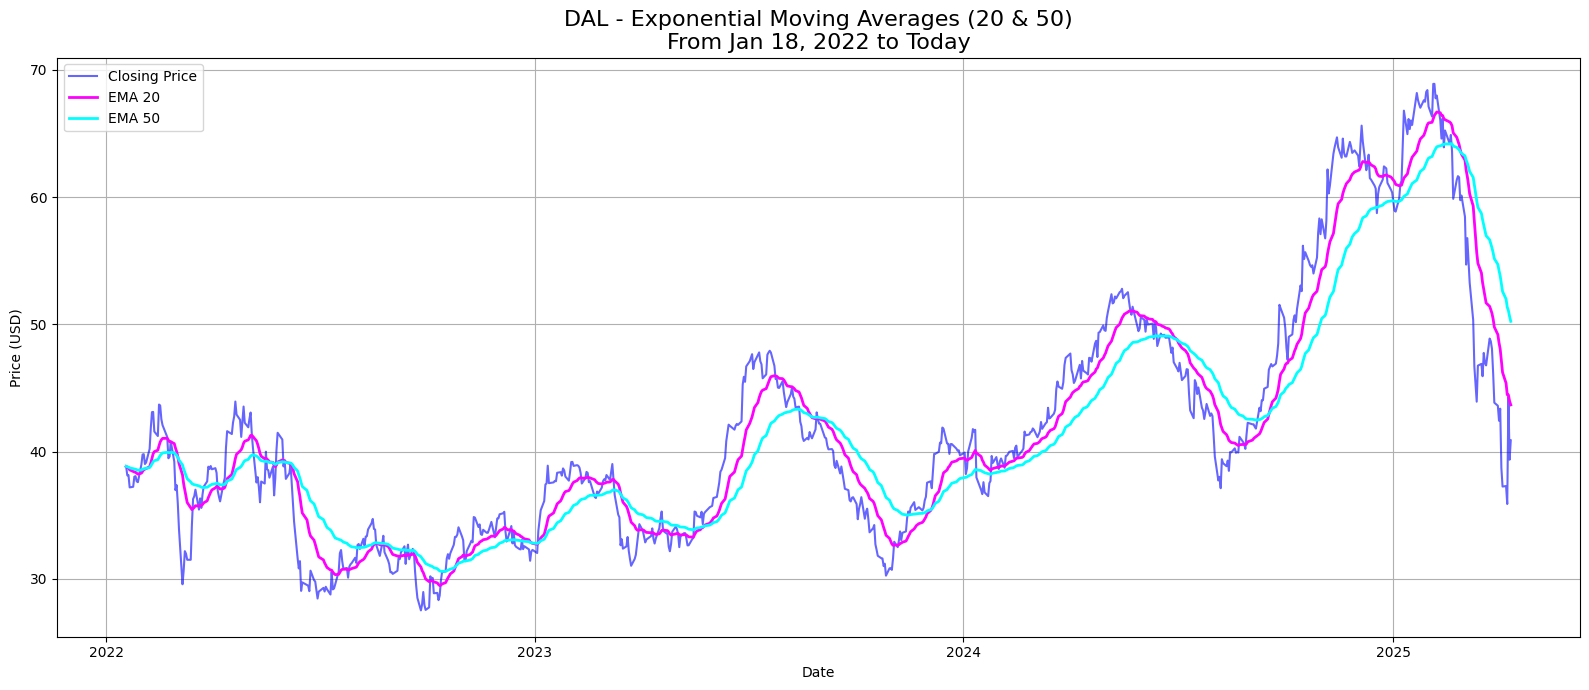

In [467]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Download DAL stock data from Jan 18, 2022 to today
df = yf.download("DAL", start="2022-01-18")

# Calculate EMA 20 and EMA 50
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()

# Drop initial rows with NaN values for clean plotting
df = df.dropna()

# Plotting
plt.figure(figsize=(16, 7))
plt.plot(df['Close'], label='Closing Price', color='blue', alpha=0.6, linewidth=1.5)
plt.plot(df['EMA20'], label='EMA 20', color='magenta', linewidth=2)
plt.plot(df['EMA50'], label='EMA 50', color='cyan', linewidth=2)

# Formatting
plt.title('DAL - Exponential Moving Averages (20 & 50)\nFrom Jan 18, 2022 to Today', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Format x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


In [468]:
df['Signal'] = 0.0  
df['Signal'] = np.where(df['EMA20'] > df['EMA50'], 1.0, 0.0)

In [469]:
df['Position'] = df['Signal'].diff()

<Figure size 2000x1000 with 0 Axes>

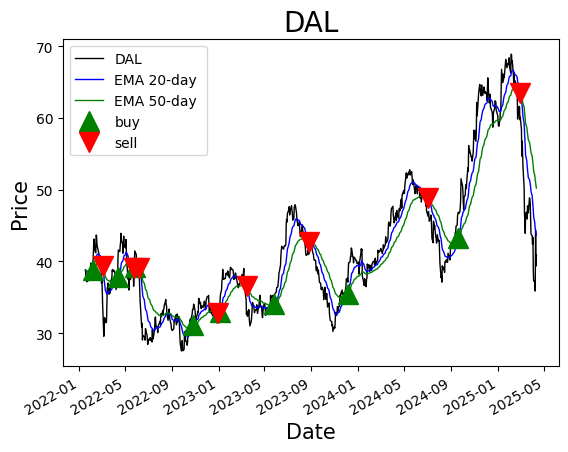

<Figure size 640x480 with 0 Axes>

In [470]:
plt.figure(figsize = (20, 10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', lw = 1, label = 'Close')  
df['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df[df['Position'] == 1].index, 
         df['EMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, 
         df['EMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('DAL' , fontsize = 20)
plt.legend()
plt.figure()
plt.show()

In [471]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+--------------------+-------------------+------------------+-------------------+---------------------+-----------------+-----------------+------------------+--------------------+
| Date                |   ('Close', 'DAL') |   ('High', 'DAL') |   ('Low', 'DAL') |   ('Open', 'DAL') |   ('Volume', 'DAL') |   ('EMA20', '') |   ('EMA50', '') |   ('Signal', '') | ('Position', '')   |
|---------------------+--------------------+-------------------+------------------+-------------------+---------------------+-----------------+-----------------+------------------+--------------------|
| 2022-02-07 00:00:00 |            40.2083 |           40.5521 |          39.6976 |           39.7467 |            11417500 |         38.8104 |         38.741  |                1 | Buy                |
| 2022-03-04 00:00:00 |            33.9031 |           35.2289 |          33.5593 |           34.8754 |            23278800 |         39.0651 |         39.3326 |                0 | Sell       